In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df =pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)


In [89]:
! pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [90]:
df.head

<bound method NDFrame.head of                 Cases
Date                 
2020-01-22        557
2020-01-23        657
2020-01-24        944
2020-01-25       1437
2020-01-26       2120
...               ...
2023-05-03  676024901
2023-06-03  676082941
2023-07-03  676213378
2023-08-03  676392824
2023-09-03  676570149

[1143 rows x 1 columns]>

<Axes: xlabel='Date'>

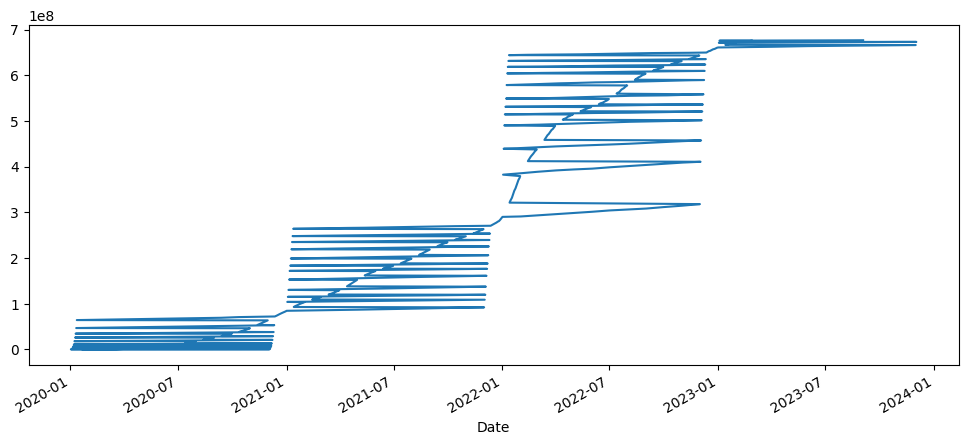

In [91]:
df['Cases'].plot(figsize=(12,5))

In [93]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

ad_test(df)

1. ADF :  0.008113651752569872
2. P-Value :  0.9591979579662503
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression: 1121
5. Critical Values :
	 1% :  -3.436196866494929
	 5% :  -2.864121720649023
	 10% :  -2.568144581443706


In [150]:
df.shape

(1143, 1)

In [152]:
1143*0.8

914.4000000000001

In [95]:
train=df.iloc[:914]

In [153]:
test=df.iloc[914:]

In [154]:
print(train.shape,test.shape)

(1114, 1) (229, 1)


In [155]:
from pmdarima import auto_arima
import warnings

In [156]:
warnings.filterwarnings("ignore")

In [157]:
stepwisefit=auto_arima(train,trace=True,suppress_warnings=True)
stepwisefit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=29749.361, Time=0.63 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=30338.136, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=30336.050, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=30331.380, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=30200.527, Time=0.30 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=30101.058, Time=0.17 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=29682.080, Time=0.83 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=30068.468, Time=0.25 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=29482.510, Time=1.12 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=29961.406, Time=0.50 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=29383.192, Time=1.33 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=29752.294, Time=0.36 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=29370.568, Time=1.33 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=29485.588, Time=1.57 sec
 ARIMA(5,2,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1114
Model:               SARIMAX(5, 2, 5)   Log Likelihood              -14620.365
Date:                Thu, 11 Apr 2024   AIC                          29262.730
Time:                        22:53:17   BIC                          29317.883
Sample:                             0   HQIC                         29283.583
                               - 1114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2682      0.057      4.720      0.000       0.157       0.380
ar.L2         -0.9680      0.048    -20.281      0.000      -1.062      -0.874
ar.L3         -0.0180      0.079     -0.227      0.821      -0.174       0.138
ar.L4         -0.5301      0.042    -12.488      0.000      -0.613      -0.447
ar.L5         -0.5275      0.052    -10.178      0.000      -0.629      -0.426
ma.L1         -0.8678      0.061    -14.222      0.000      -0.987      -0.748
ma.L2          1.1878      0.075     15.914      0.000       1.042       1.334
ma.L3         -0.6587      0.094     -7.035      0.000      -0.842      -0.475
ma.L4          0.5847      0.061      9.547      0.000       0.465       0.705
ma.L5         -0.0263      0.044     -0.602      0.547      -0.112       0.059
sigma2      2.265e+10    1.2e-11   1.89e+21      0.000    2.27e+10    2.27e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             11898.41
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.99   Skew:                             1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+37. Standard errors may be unstable.
"""

(5, 2, 5)

In [158]:
from statsmodels.tsa.arima.model import ARIMA
param=stepwisefit.get_params()
ord=param['order']
model=ARIMA(train,order=ord)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Cases   No. Observations:                 1114
Model:                 ARIMA(5, 2, 5)   Log Likelihood              -14620.365
Date:                Thu, 11 Apr 2024   AIC                          29262.730
Time:                        22:54:18   BIC                          29317.883
Sample:                             0   HQIC                         29283.583
                               - 1114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2682      0.057      4.720      0.000       0.157       0.380
ar.L2         -0.9680      0.048    -20.281      0.000      -1.062      -0.874
ar.L3         -0.0180      0.079     -0.227      0.821      -0.174       0.138
ar.L4         -0.5301      0.042    -12.488      0.000      -0.613      -0.447
ar.L5         -0.5275      0.052    -10.178      0.000      -0.629      -0.426
ma.L1         -0.8678      0.061    -14.222      0.000      -0.987      -0.748
ma.L2          1.1878      0.075     15.914      0.000       1.042       1.334
ma.L3         -0.6587      0.094     -7.035      0.000      -0.842      -0.475
ma.L4          0.5847      0.061      9.547      0.000       0.465       0.705
ma.L5         -0.0263      0.044     -0.602      0.547      -0.112       0.059
sigma2      2.265e+10    1.2e-11   1.89e+21      0.000    2.27e+10    2.27e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             11898.41
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.99   Skew:                             1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+37. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

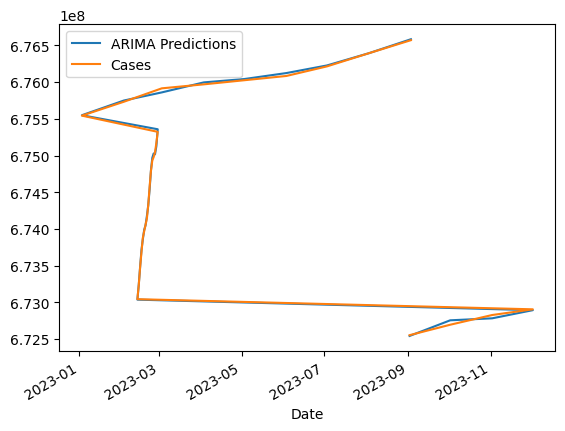

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Cases'].plot(legend=True)

In [ ]:
test2=df.iloc[:500]

In [ ]:
test2

,Cases
Date,
2020-01-22,557
2020-01-23,657
2020-01-24,944
2020-01-25,1437
2020-01-26,2120
...,...
2021-05-31,171240130
2021-01-06,171700134
2021-02-06,172187762


<Axes: xlabel='Date'>

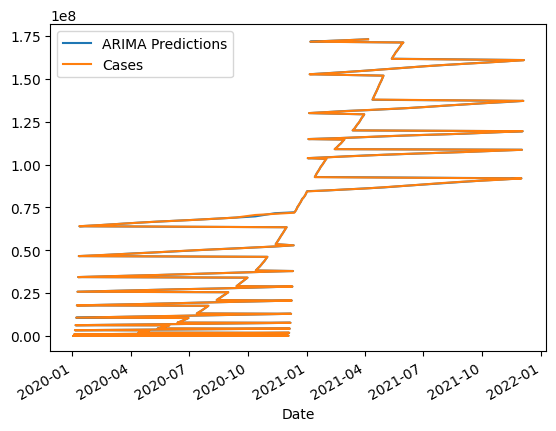

In [ ]:
start=0
end=499
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test2['Cases'].plot(legend=True)

In [ ]:
test2['pred']=pred.astype(int)

<Axes: xlabel='Date'>

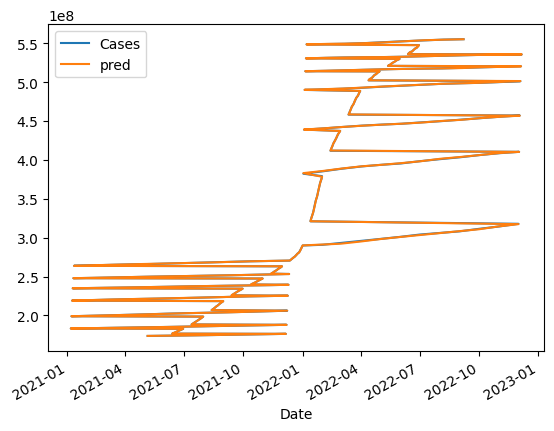

In [ ]:
test2.plot()

In [ ]:
test2.head()

,Cases,pred
Date,,
2020-01-22,557,0
2020-01-23,657,1276
2020-01-24,944,410
2020-01-25,1437,1044
2020-01-26,2120,1812


<Axes: xlabel='Date'>

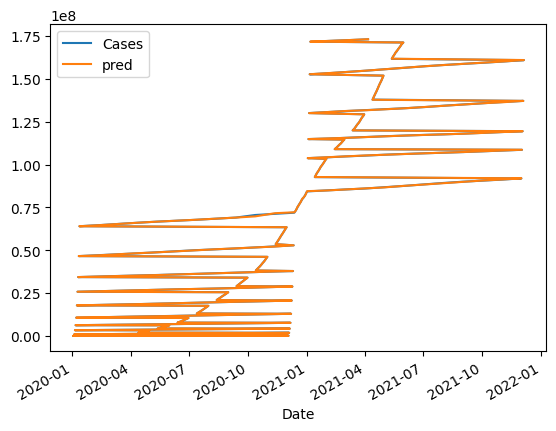

In [ ]:
# final function
test2.plot()

In [114]:
# final function
def forecast(inputlst,upto):
    data=pd.DataFrame(inputlst)
    stepwise_fit=auto_arima(data,trace=True,suppress_warnings=True)
    param=stepwise_fit.get_params()
    ord=param['order']
    model=ARIMA(data,order=ord)
    model=model.fit()

    start=len(data)
    end=len(data)+upto-1
    pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
    return pred.astype(int)


    

In [115]:
lst=[]
for index, row in df.iterrows():
    lst.append(row['Cases'])

In [131]:
ip1=lst[:500]
exp=lst[500:643]


In [117]:
500+144

644

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=12400.621, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=12610.536, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=12595.102, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=12576.685, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=12520.925, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=12511.657, Time=0.11 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=12341.478, Time=0.53 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=12463.156, Time=0.12 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=12313.576, Time=0.56 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=12415.420, Time=0.12 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=12305.215, Time=0.75 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=12385.382, Time=0.21 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=12314.350, Time=0.80 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=12338.726, Time=0.62 sec
 ARIMA(5,2,2)(0,0,0

(143,)

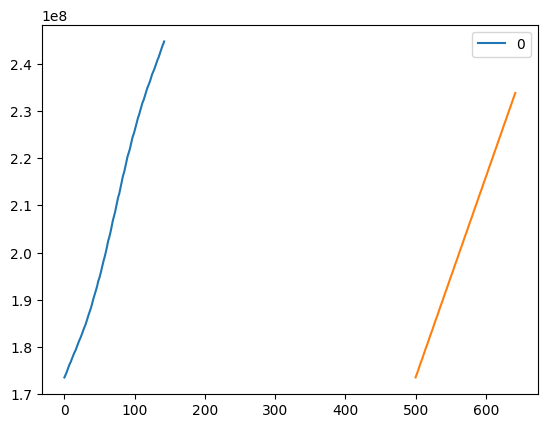

In [132]:
pred3=forecast(ip1,143)


dfexp=pd.DataFrame(exp)
dfexp.plot(label='true')
pred3.plot(label='Predicted')

pred3.shape

In [120]:
len(pred3)

143

In [133]:
dfexp.shape

(143, 1)

In [128]:
dfexp.head()

,0
0,173489803
1,173812784
2,174134551
3,174504668
4,174922960


In [134]:
pdf= pd.DataFrame(pred3)

In [124]:
res=pd.DataFrame(pred3)

<Axes: >

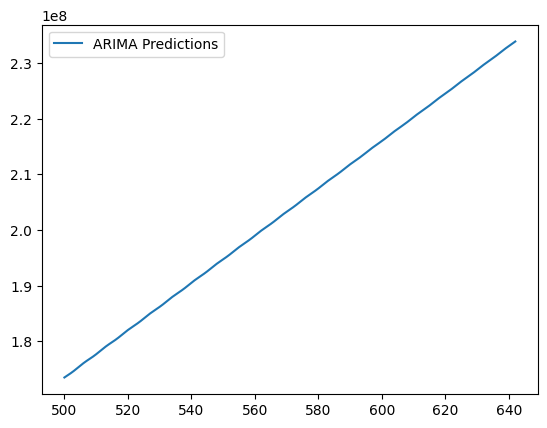

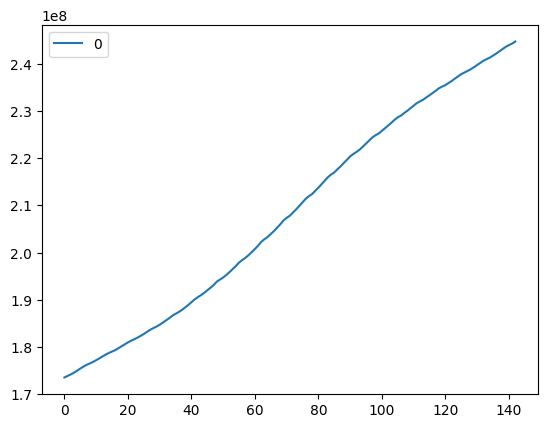

In [135]:
pdf.plot()
dfexp.plot()

In [126]:
res["True"]=dfexp

In [130]:
res.drop("True",axis=1)

,ARIMA Predictions
500,173509705
501,173892056
502,174277883
503,174698791
504,175159986
...,...
638,232193092
639,232628571
640,233041907
641,233442326


In [138]:
res1=pd.DataFrame()
res1["Arima"]=pdf

In [139]:
res1["Truevalue"]=dfexp

In [140]:
res1.head()

,Arima,Truevalue
500,173509705,NaN
501,173892056,NaN
502,174277883,NaN
503,174698791,NaN
504,175159986,NaN


In [141]:
res1.tail()

,Arima,Truevalue
638,232193092,NaN
639,232628571,NaN
640,233041907,NaN
641,233442326,NaN
642,233848674,NaN


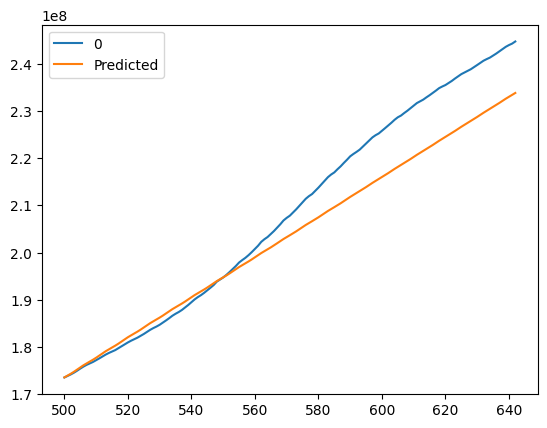

In [149]:
dfexp = pd.DataFrame(exp, index=pred3.index)  # Set the index of `exp` to match `pred3`

# Plot both DataFrames on the same graph
dfexp.plot(label='orginal')
pred3.plot(label='Predicted')
plt.legend()
plt.show()

In [148]:
pred3.index

RangeIndex(start=500, stop=643, step=1)